In [1]:
import sys
sys.path.insert(1, "games/")
sys.path.insert(1, "networks/")
from connect2 import Connect2
from connect2_net import create_network

from model import Model
import numpy as np

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display
np.random.seed(42)

In [2]:
game = Connect2()
model = Model(create_network(game.shape, game.nb_actions), summary=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           192         ['input_1[0][0]']                
                                                                                                  
 policy (Dense)                 (None, 4)            132         ['dense[0][0]']                  
                                                                                                  
 value (Dense)                  (None, 1)            33          ['dense[0][0]']                  
                                                                                              

2021-12-01 16:54:27.158299: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 16:54:27.195677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 16:54:27.196166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 16:54:27.196802: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

1/15...


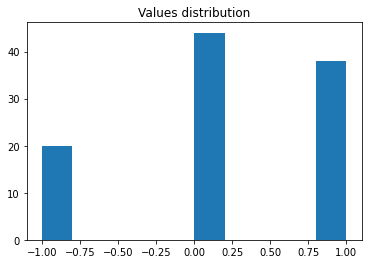

Done
policy_accuracy:  0.87 value_mse:  0.32
2/15...


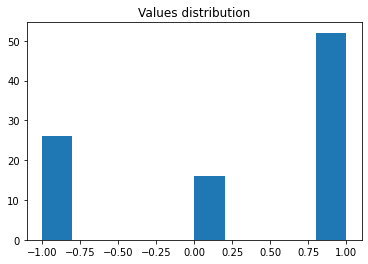

Done
policy_accuracy:  0.88 value_mse:  0.12
3/15...


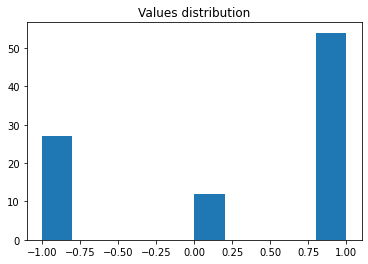

Done
policy_accuracy:  0.95 value_mse:  0.09
4/15...


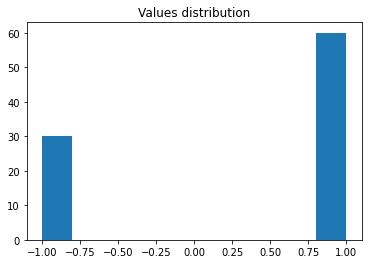

Done
policy_accuracy:  1.00 value_mse:  0.00
5/15...


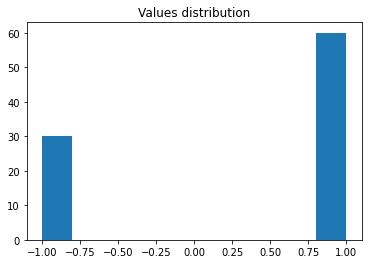

Done
policy_accuracy:  1.00 value_mse:  0.00
6/15...


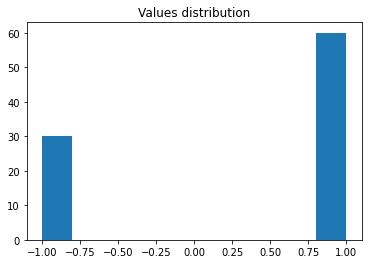

Done
policy_accuracy:  1.00 value_mse:  0.00
7/15...


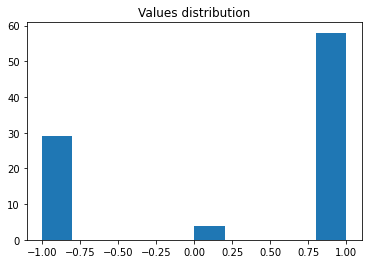

Done
policy_accuracy:  0.98 value_mse:  0.03
8/15...


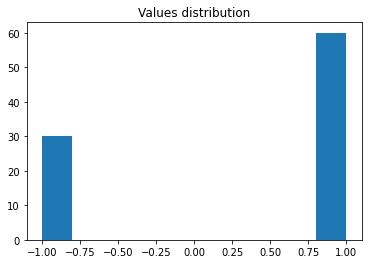

Done
policy_accuracy:  1.00 value_mse:  0.00
9/15...


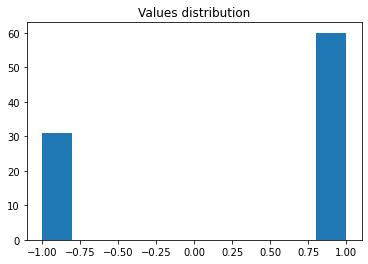

Done
policy_accuracy:  0.97 value_mse:  0.10
10/15...


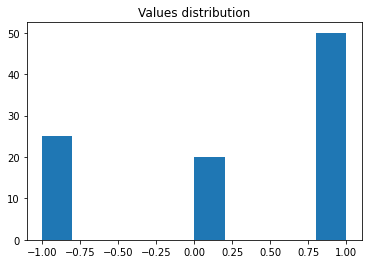

Done
policy_accuracy:  0.89 value_mse:  0.11
11/15...


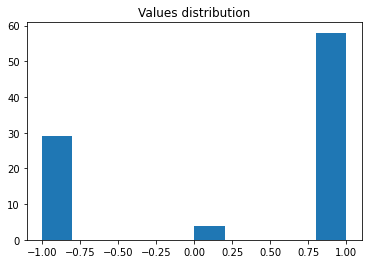

Done
policy_accuracy:  0.98 value_mse:  0.02
12/15...


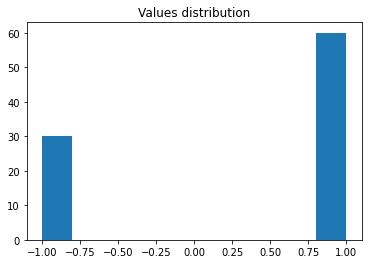

Done
policy_accuracy:  1.00 value_mse:  0.00
13/15...


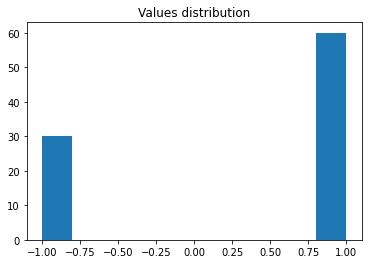

Done
policy_accuracy:  1.00 value_mse:  0.00
14/15...


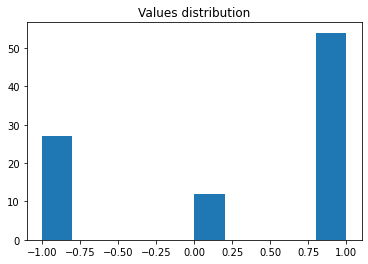

Done
policy_accuracy:  0.97 value_mse:  0.07
15/15...


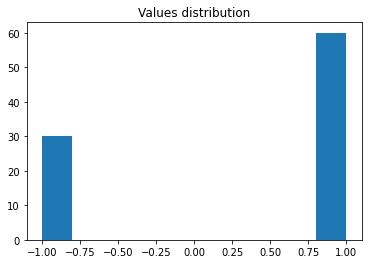

Done
policy_accuracy:  1.00 value_mse:  0.00


In [3]:
params = {"enable": False, "nb_games": 30, "nb_simulations": 100, "min_win_ratio": 0.55}
model.train(game, nb_iter=15, nb_simulations=25, nb_games=30, nb_epochs=40, accept_model_params=params)
model.save("networks/network_connect2.h5")